# **Obesity Prediction using Machine Learning**

This notebook documents the development of a machine learning model to predict obesity levels based on various health and lifestyle metrics.

## **Project Overview**

This project focuses on predicting obesity using machine learning techniques. It aims to identify obesity levels based on user attributes such as age, physical activity, eating habits, and other health-related factors.

## **📚 Libraries Used**

### **🐼 pandas (pd)**
Used for data manipulation and analysis with powerful DataFrame and Series objects.

### **🔢 numpy (np)**
Supports fast numerical operations and array handling.

### **📊 matplotlib.pyplot (plt)**
Used for creating basic visualizations like line plots and histograms.

### **🌈 seaborn (sns)**
Built on Matplotlib, it makes beautiful statistical plots easy to create.

### **🧪 train_test_split**
Splits your dataset into training and testing sets for model evaluation.

### **📏 StandardScaler**
Normalizes features by removing the mean and scaling to unit variance.

### **🔠 LabelEncoder**
Converts categorical labels into numeric format for machine learning models.

### **💡 SVC (Support Vector Classifier)**
A powerful algorithm for classification tasks using support vector machines.

### **💾 pickle**
Used to save and load Python objects like trained machine learning models.



### **🚀 Import necessary libraries**

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import pickle

### **📥 Data Collection & Understanding**
🔹 **Data Collection** – Gathering data from files, databases, APIs, or web scraping.

🔹 **Data Inspection** – Checking structure, shape, and data types.

🔹 **Summary Statistics** – Viewing mean, median, min, max, etc., for numeric data.

🔹 **Missing Value Detection** – Finding null or missing entries in the dataset.

🔹 **Feature Types** – Identifying categorical and numerical columns.

🔹 **Value Distribution** – Understanding how data values are spread.

🔹 **Class Balance** – Checking for imbalance in classification target labels.

### **🧾 Obesity Prediction Dataset**

This dataset includes various features related to individual lifestyle and health, used to predict obesity levels.

### **🔢 Columns Description**

1. **Age** – Age of the individual
2. **Gender** – Biological gender (Male/Female)
3. **Height** – Height in meters
4. **Weight** – Weight in kilograms
5. **CALC** – Frequency of alcohol consumption
6. **FAVC** – Frequent consumption of high caloric food (Yes/No)
7. **FCVC** – Frequency of vegetable consumption
8. **NCP** – Number of main meals
9. **SCC** – Consumption of food between meals (Yes/No)
10. **SMOKE** – Smoking habit (Yes/No)
11. **CH2O** – Daily water consumption (liters)
12. **family_history_with_overweight** – Family history of overweight (Yes/No)
13. **FAF** – Physical activity frequency
14. **TUE** – Time spent using technology devices
15. **NObeyesdad** – Obesity classification (target variable)


In [73]:
class DataLoader:
    def __init__(self, filepath):
        self.filepath = filepath
        self.data = None

    # 📥 Data Collection
    def load_data(self):
        self.data = pd.read_csv(self.filepath)
        return self.data

    # 🔍 Summary Statistics
    def show_summary(self):
        return self.data.describe()

    # 🧾 Data Inspection
    def show_info(self):
        return self.data.info()

    # ❗ Missing Value Detection
    def check_missing_values(self):
        return self.data.isnull().sum()

    # 🔢 Feature Types
    def feature_types(self):
        categorical = self.data.select_dtypes(include='object').columns.tolist()
        numerical = self.data.select_dtypes(include='number').columns.tolist()
        return {'categorical': categorical, 'numerical': numerical}

    # 📊 Value Distribution
    def plot_distribution(self, column):
        sns.histplot(self.data[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()

    # ⚖️ Class Balance
    def class_balance(self, target_column):
        return self.data[target_column].value_counts()

# Calling the DataLoader
if __name__ == "__main__":
    dataset_path = r"C:\Users\Super\OneDrive\Desktop\ML Project\ObesityDataSet.csv"

    # Step 1: Load and Inspect Data
    loader = DataLoader(dataset_path)
    data = loader.load_data()

    print("\n📄 Dataset Info:")
    loader.show_info()

    print("\n📊 Summary Statistics:")
    print(loader.show_summary())

    print("\n🔍 Missing Values:")
    print(loader.check_missing_values())

    print("\n🔠 Feature Types:")
    print(loader.feature_types())

    print("\n⚖️ Class Balance:")
    print(loader.class_balance("NObeyesdad"))



📄 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2077 non-null   float64
 3   Weight                          2064 non-null   float64
 4   CALC                            2073 non-null   object 
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2089 non-null   float64
 7   NCP                             2086 non-null   float64
 8   SCC                             2087 non-null   float64
 9   SMOKE                           2066 non-null   float64
 10  CH2O                            2082 non-null   float64
 11  family_history_with_overweight  2111 non-null   int64  
 12  FAF              

### **🧹 Data Preprocessing & Analysis**
🔹 **Handling Missing Values** – Filling or removing null values to clean the data.

🔹 **Encoding Categorical Data** – Converting text labels into numerical format.

🔹 **Feature Scaling** – Normalizing or standardizing numerical features.

🔹 **Outlier Detection** – Identifying and managing extreme values in the data.

🔹 **Feature Selection** – Choosing the most relevant features for the model.

🔹 **Correlation Analysis** – Finding relationships between variables.

🔹 **Data Visualization** – Using plots to understand trends, patterns, and distributions

In [74]:
class DataPreprocessor:
    def __init__(self, data):
        self.data = data

    def clean_data(self):
        self.data = self.data.dropna().copy()
        return self.data


    def encode_categoricals(self):
        label_encoders = {}
        for col in self.data.select_dtypes(include='object').columns:
            if col != 'NObeyesdad':
                le = LabelEncoder()
                self.data[col] = le.fit_transform(self.data[col].astype(str))
                label_encoders[col] = le
        return self.data, label_encoders

    def describe(self):
        return self.data.describe()

    def info(self):
        return self.data.info()

    def head(self):
        return self.data.head()

    def tail(self):
        return self.data.tail()

    def sample(self, n):
        return self.data.sample(n)

    def scale_features(self, X):
        scaler = StandardScaler()
        return scaler.fit_transform(X)

# Calling the DataPreprocessor
# 🧹 DataPreprocessor Full Method Calls
preprocessor = DataPreprocessor(data)

# Cleaning data
data_clean = preprocessor.clean_data()

# Encoding categorical features
data_encoded, encoders = preprocessor.encode_categoricals()

# Descriptive statistics and inspection
print("\n📊 Describe:")
print(preprocessor.describe())

print("\nℹ️ Info:")
preprocessor.info()

print("\n🔝 Head:")
print(preprocessor.head())

print("\n🔚 Tail:")
print(preprocessor.tail())

print("\n🎲 Sample:")
print(preprocessor.sample(5))

# Splitting features and scaling
X = data_encoded.drop(columns=["NObeyesdad"])
y = data_encoded["NObeyesdad"]
X_scaled = preprocessor.scale_features(X)



📊 Describe:
               Age       Gender       Height       Weight         CALC  \
count  1806.000000  1806.000000  1806.000000  1806.000000  1806.000000   
mean     24.127657     0.484496     1.700190    86.097003     2.074197   
std       6.290584     0.499898     0.093234    26.429903     1.359497   
min      14.000000     0.000000     1.450000    39.000000     0.000000   
25%      19.672223     0.000000     1.630000    65.000000     0.000000   
50%      22.655674     0.000000     1.700000    82.461669     3.000000   
75%      26.000000     1.000000     1.767483   106.398174     3.000000   
max      61.000000     1.000000     1.980000   173.000000     3.000000   

              FAVC         FCVC          NCP          SCC        SMOKE  \
count  1806.000000  1806.000000  1806.000000  1806.000000  1806.000000   
mean      0.873754     2.425480     2.704973     0.049280     0.023810   
std       0.332218     0.538019     0.759698     0.216512     0.152498   
min       0.000000     1

### **📈 Univariate Analysis**
🔹 **Definition** – Analyzing a single variable at a time to understand its distribution and characteristics.

🔹 **Purpose** – Helps detect patterns, outliers, and potential preprocessing needs for individual features.

🔹 **Types** – Includes analysis of both numerical and categorical variables.

🔹 **Numerical Variables** – Typically visualized using histograms, boxplots, or density plots.

🔹 **Categorical Variables** – Analyzed using bar plots or value counts


📊 Numerical Distributions:


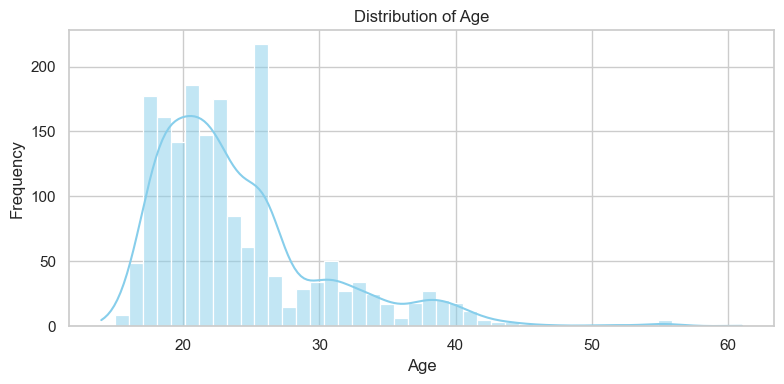

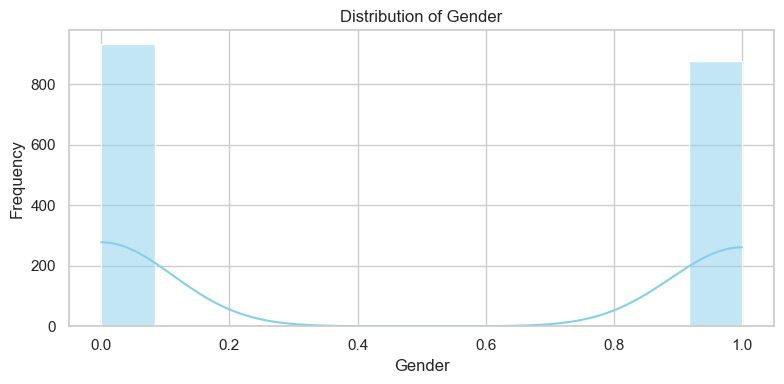

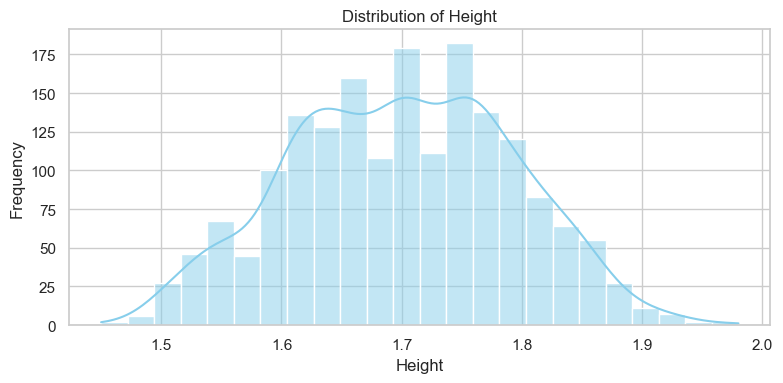

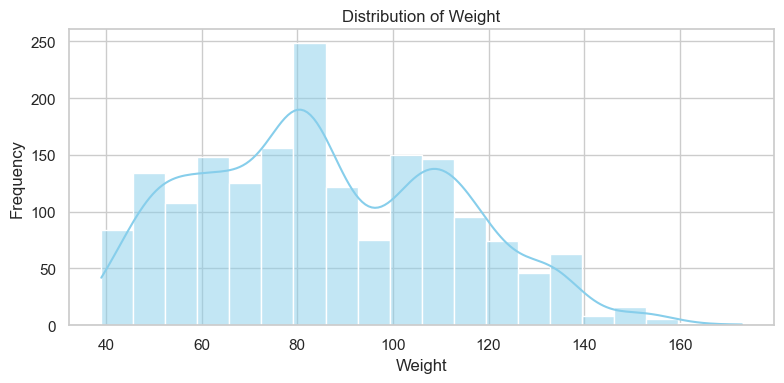

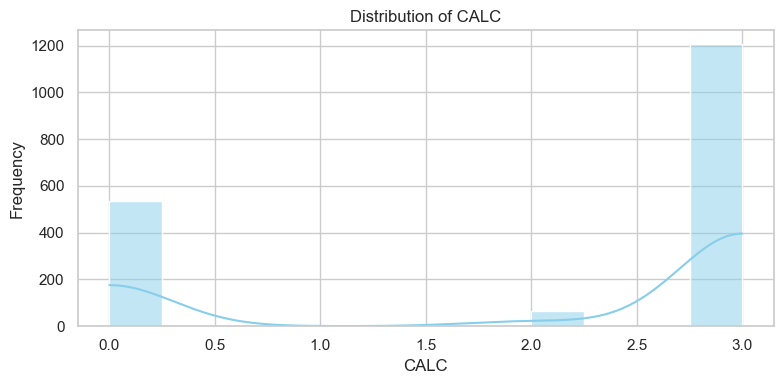

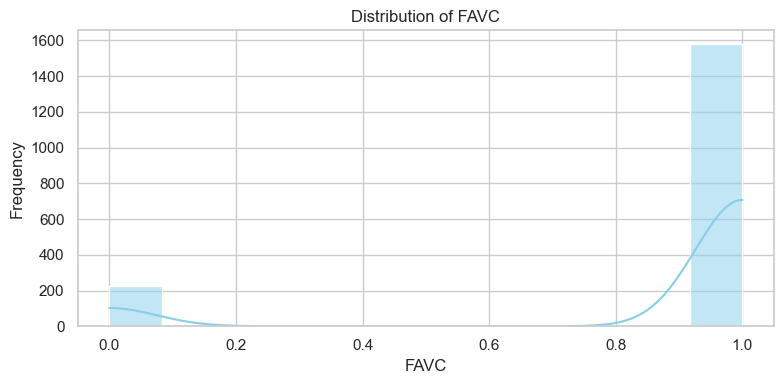

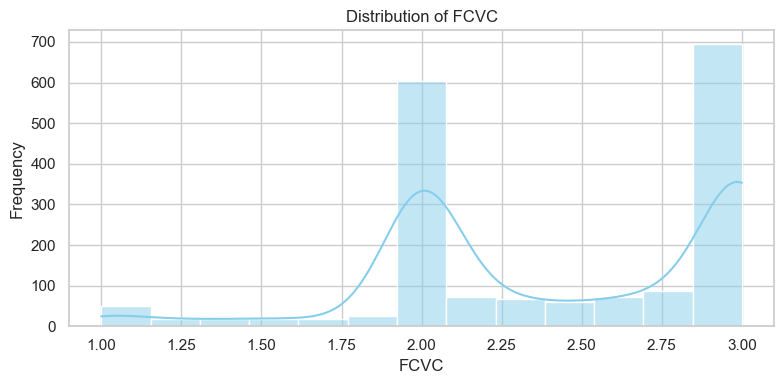

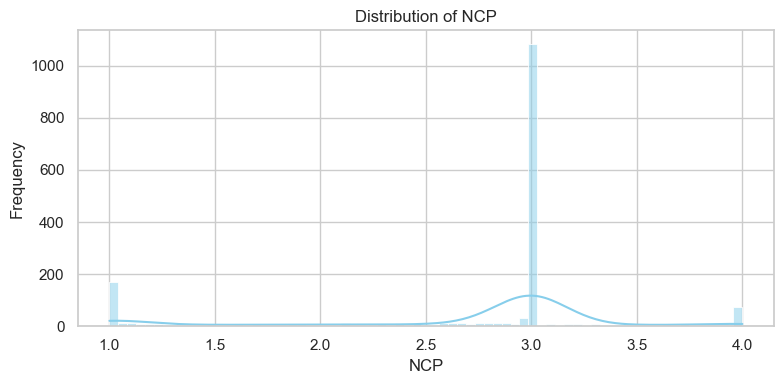

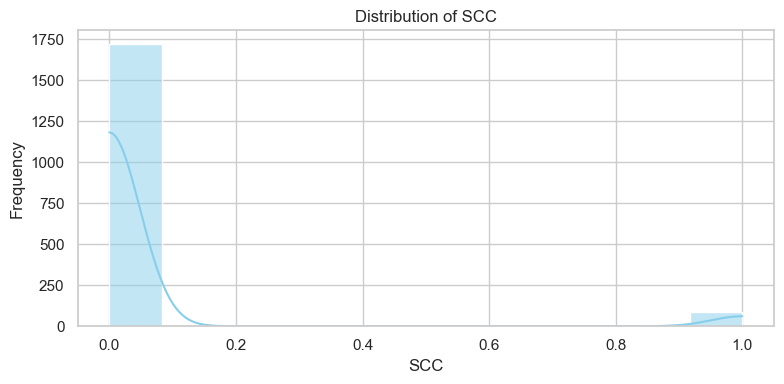

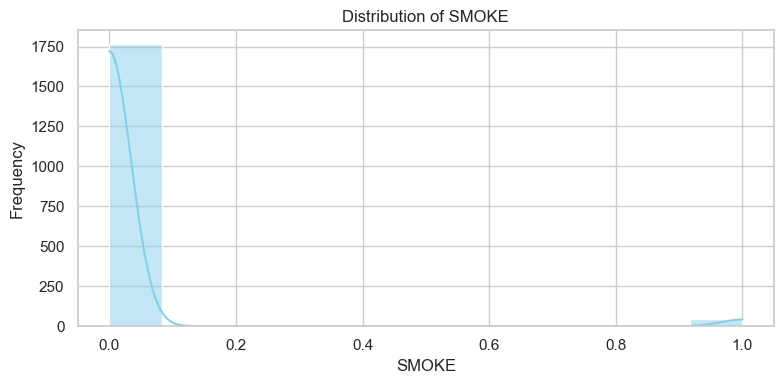

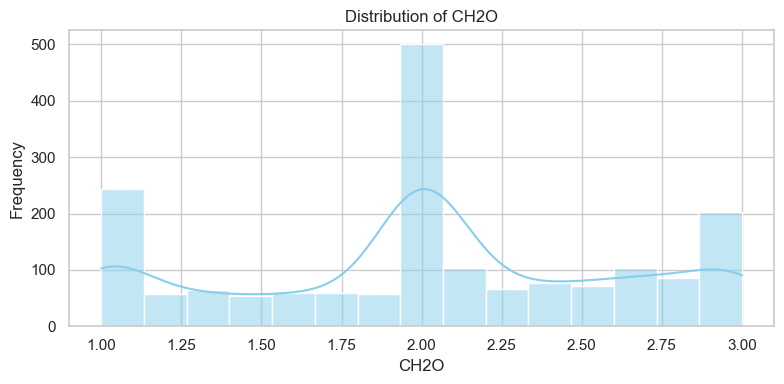

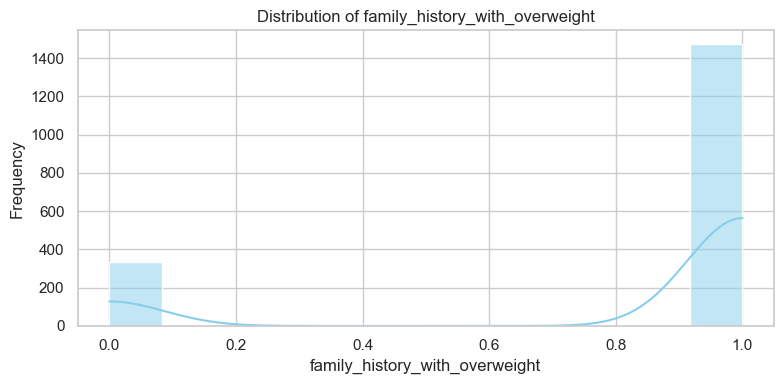

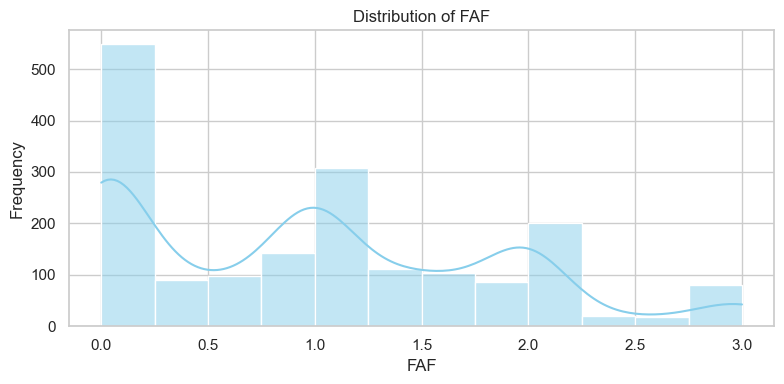

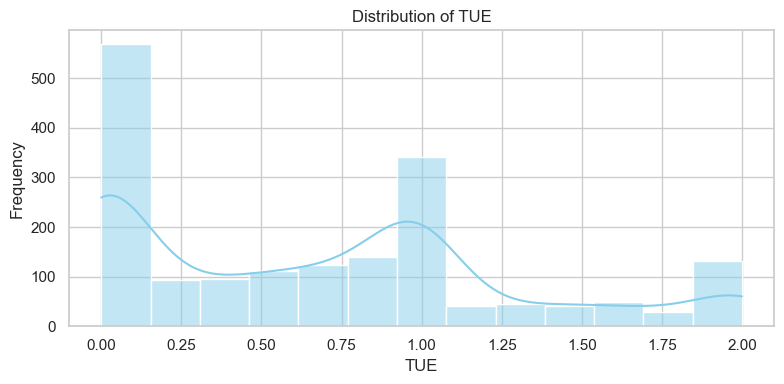


📦 Numerical Boxplots:


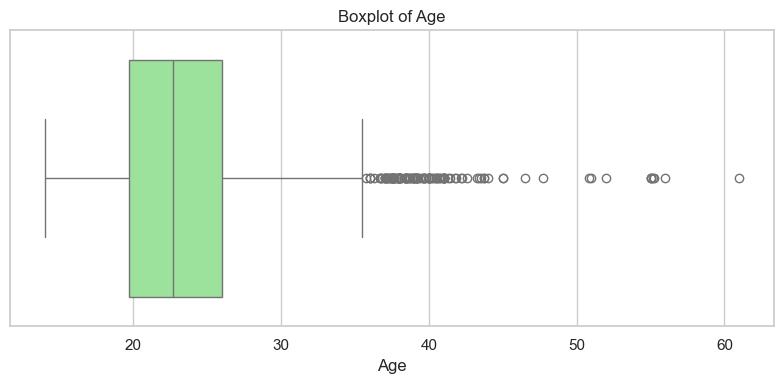

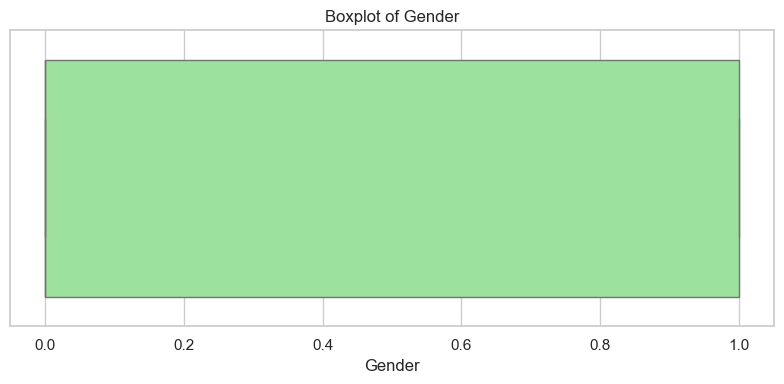

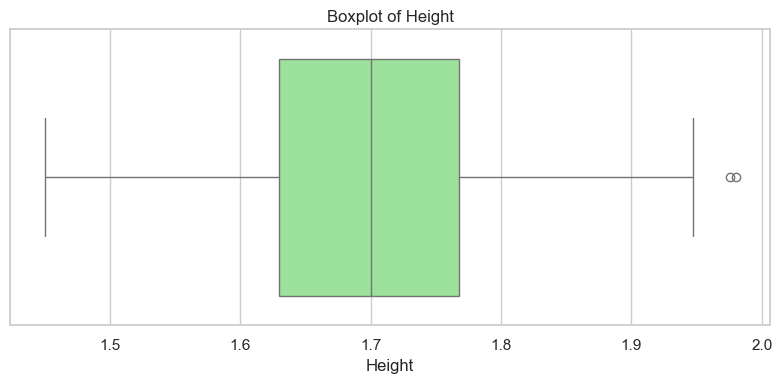

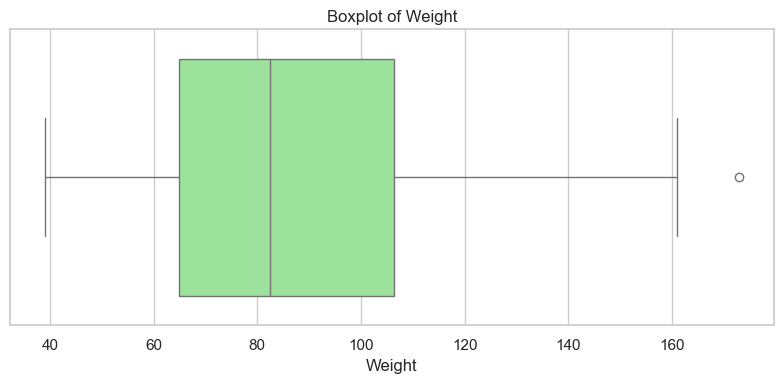

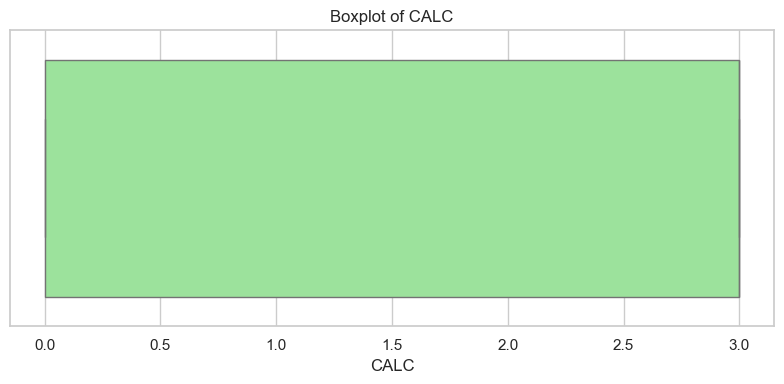

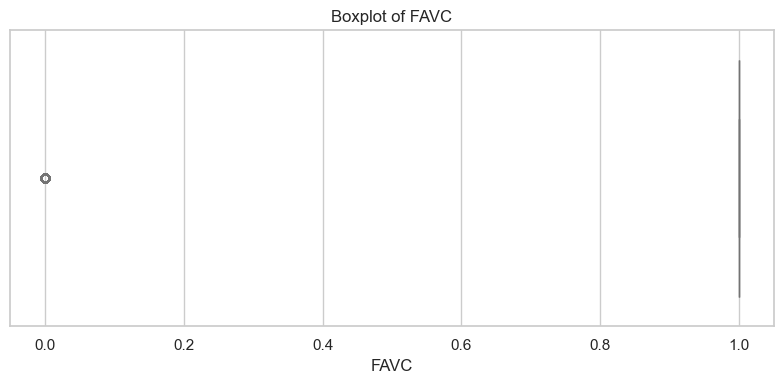

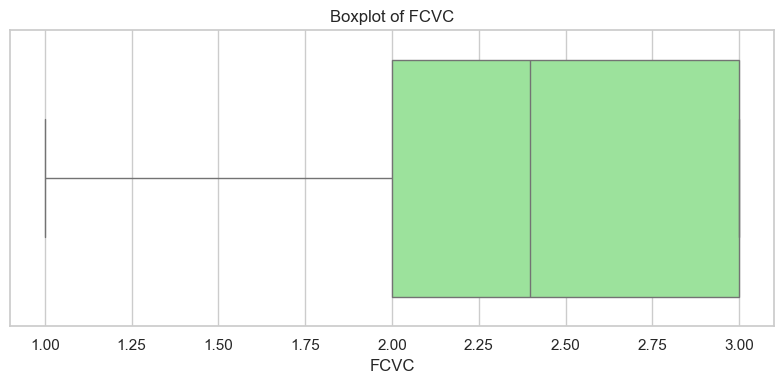

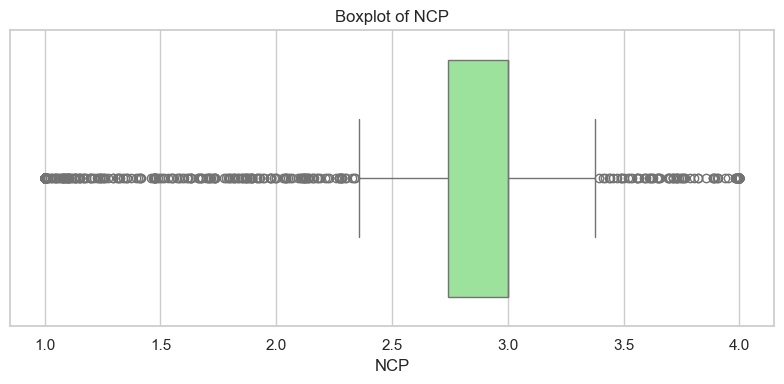

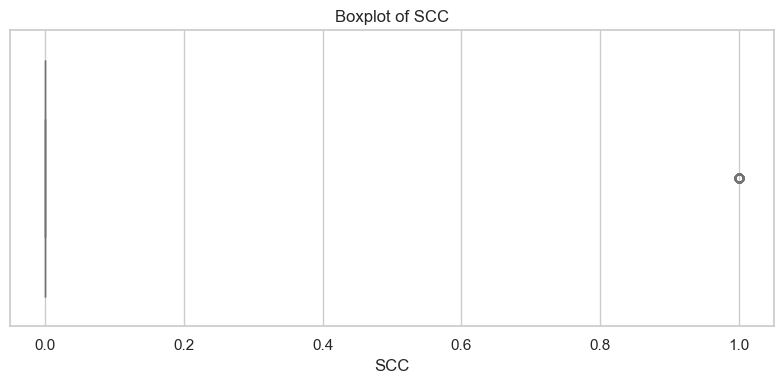

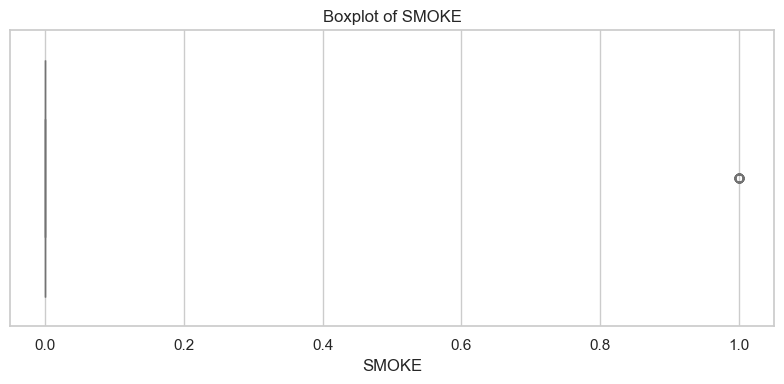

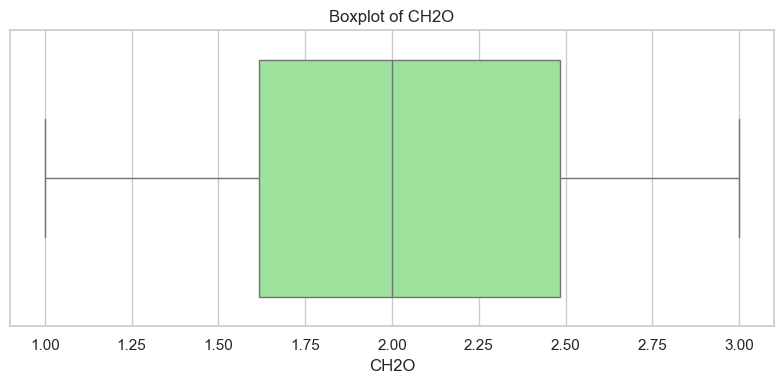

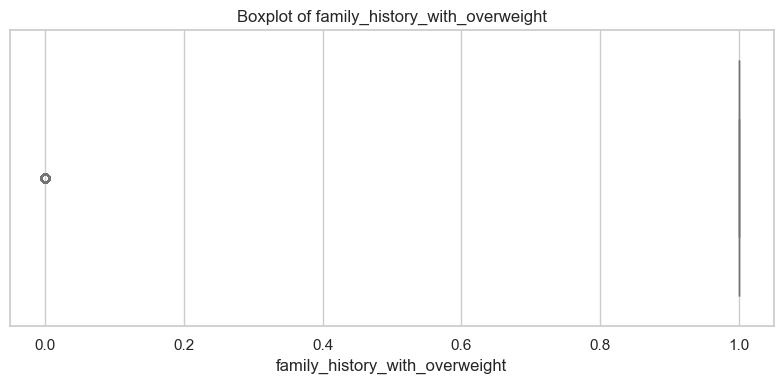

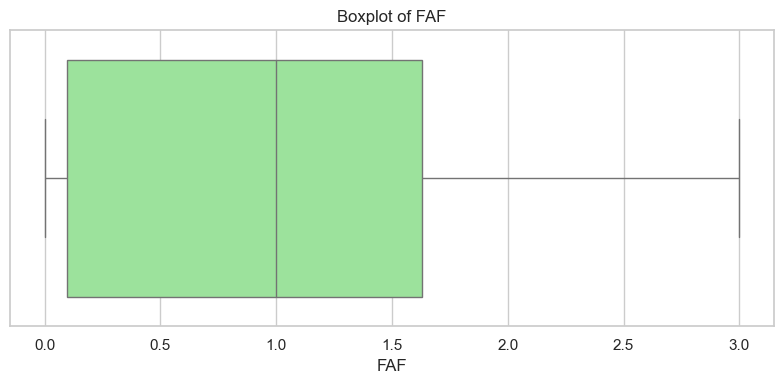

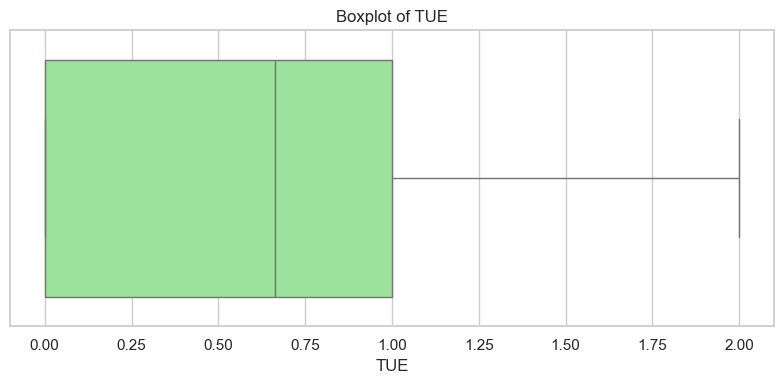


📈 Categorical Counts:


C:\Users\Super\AppData\Local\Temp\ipykernel_13440\867697200.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=self.data, palette='viridis')


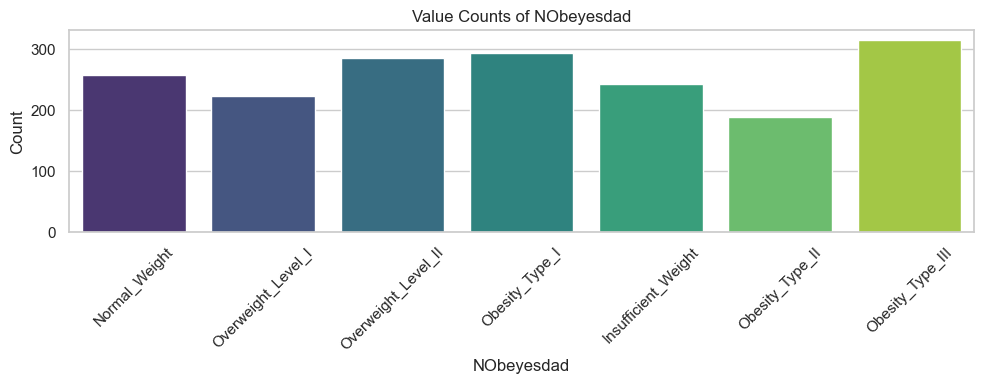

In [75]:
class UnivariateAnalyzer:
    def __init__(self, data):
        self.data = data
        sns.set(style="whitegrid")

    def plot_numerical_distributions(self):
        numerical_cols = self.data.select_dtypes(include='number').columns
        for col in numerical_cols:
            plt.figure(figsize=(8, 4))
            sns.histplot(self.data[col], kde=True, color='skyblue')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()

    def plot_numerical_boxplots(self):
        numerical_cols = self.data.select_dtypes(include='number').columns
        for col in numerical_cols:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=self.data[col], color='lightgreen')
            plt.title(f'Boxplot of {col}')
            plt.xlabel(col)
            plt.tight_layout()
            plt.show()

    def plot_categorical_counts(self):
        categorical_cols = self.data.select_dtypes(include='object').columns
        for col in categorical_cols:
            plt.figure(figsize=(10, 4))
            sns.countplot(x=col, data=self.data, palette='viridis')
            plt.title(f'Value Counts of {col}')
            plt.xticks(rotation=45)
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.tight_layout()
            plt.show()

# Calling the UnivariateAnalyzer
if __name__ == "__main__":
    analyzer = UnivariateAnalyzer(data_encoded)

    print("\n📊 Numerical Distributions:")
    analyzer.plot_numerical_distributions()

    print("\n📦 Numerical Boxplots:")
    analyzer.plot_numerical_boxplots()

    print("\n📈 Categorical Counts:")
    analyzer.plot_categorical_counts()

### **🔗 Bivariate Analysis**
🔹 **Definition** – Analyzing the relationship between two variables at a time.

🔹 **Purpose** – Helps uncover correlations, associations, or dependencies between features.

🔹 **Types of Variables** – Can involve numerical-numerical, numerical-categorical, or categorical-categorical combinations.

🔹 **Numerical-Numerical** – Use scatter plots or correlation coefficients to check relationships.

🔹 **Numerical-Categorical** – Use box plots or violin plots to compare distributions across categories.

🔹 **Categorical-Categorical** – Use heatmaps or stacked bar charts to show frequency patterns.

🔹 **Insights Gained** – Helps in feature selection, detecting multicollinearity, or predictor strength.


📊 Correlation Heatmap:


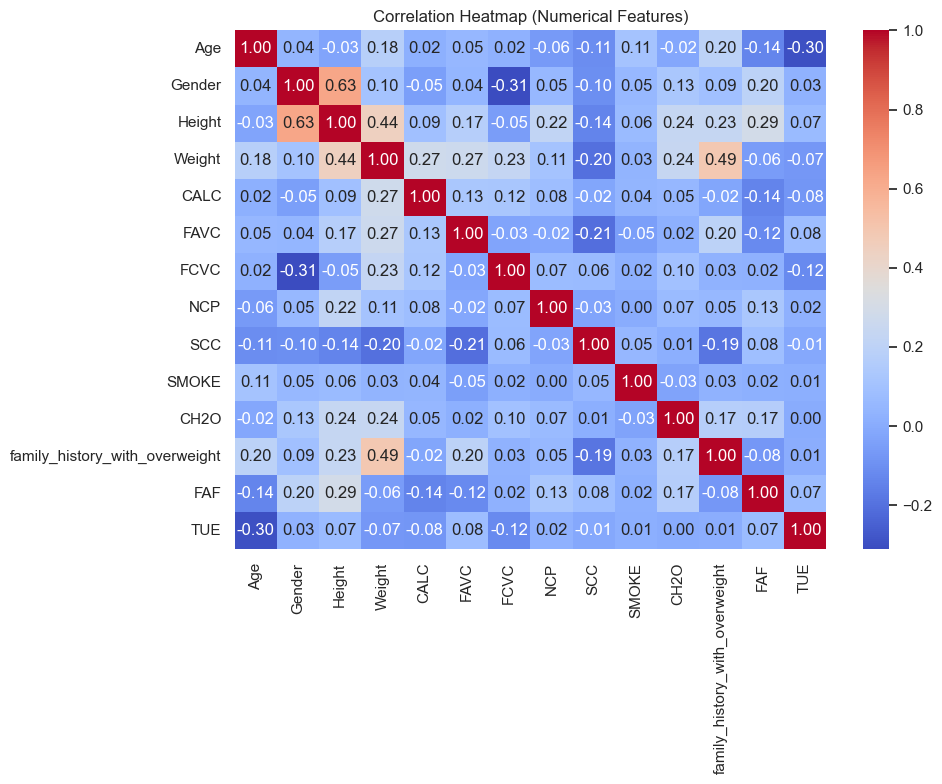


📦 Boxplots Against Target:


C:\Users\Super\AppData\Local\Temp\ipykernel_13440\2862060392.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.target, y=col, data=self.data, palette="Set2")


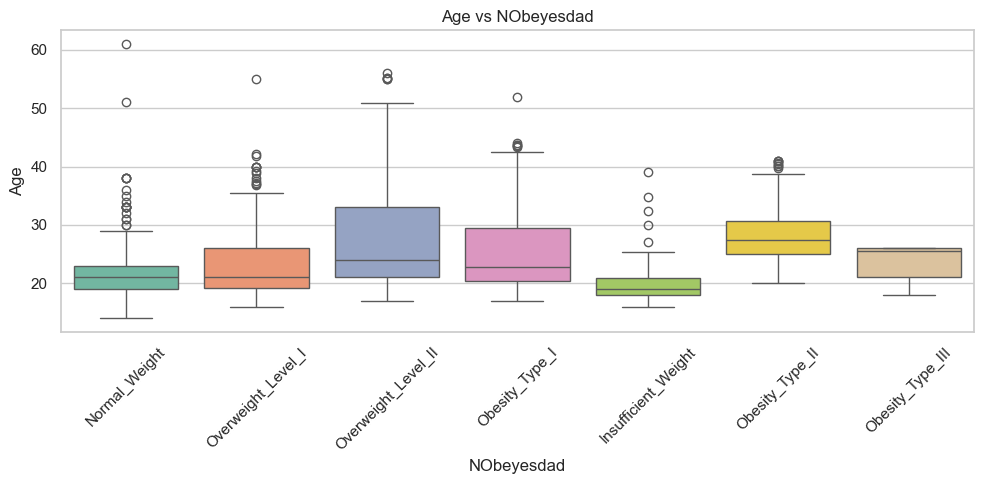

C:\Users\Super\AppData\Local\Temp\ipykernel_13440\2862060392.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.target, y=col, data=self.data, palette="Set2")


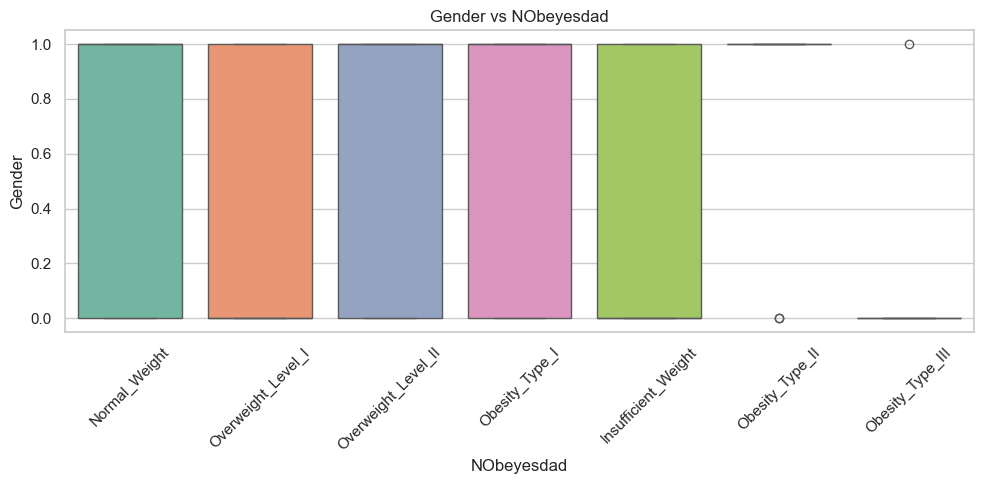

C:\Users\Super\AppData\Local\Temp\ipykernel_13440\2862060392.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.target, y=col, data=self.data, palette="Set2")


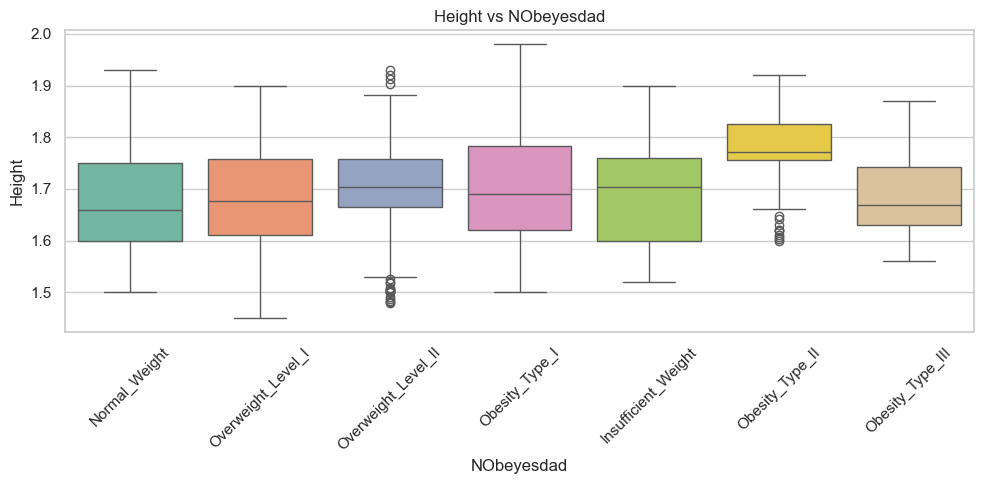

C:\Users\Super\AppData\Local\Temp\ipykernel_13440\2862060392.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.target, y=col, data=self.data, palette="Set2")


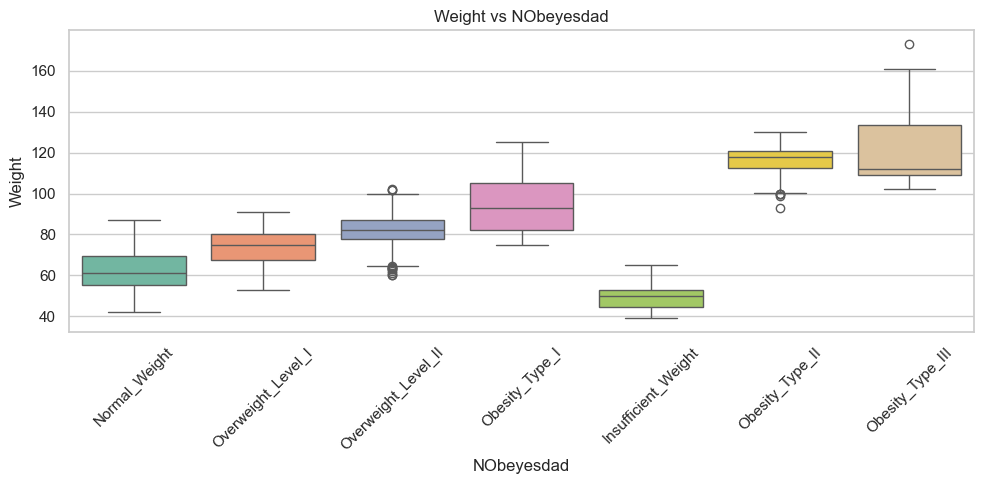

C:\Users\Super\AppData\Local\Temp\ipykernel_13440\2862060392.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.target, y=col, data=self.data, palette="Set2")


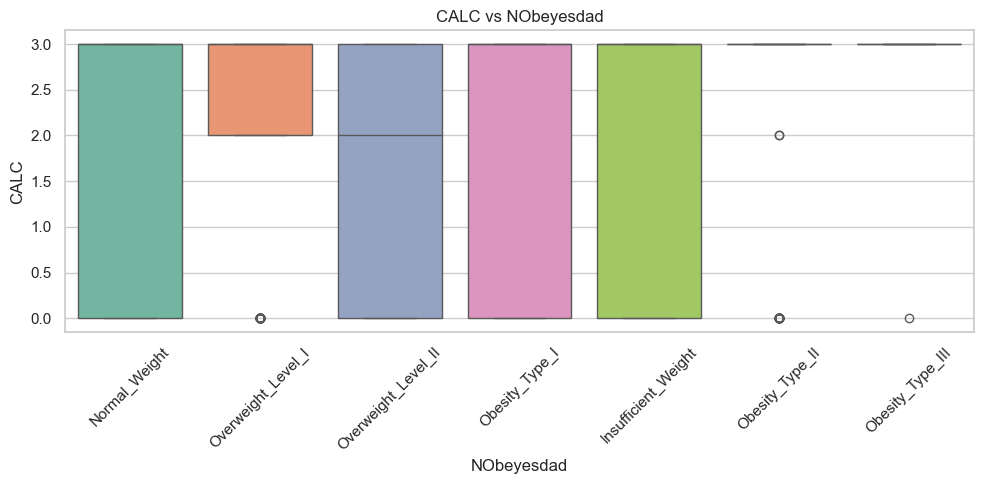

C:\Users\Super\AppData\Local\Temp\ipykernel_13440\2862060392.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.target, y=col, data=self.data, palette="Set2")


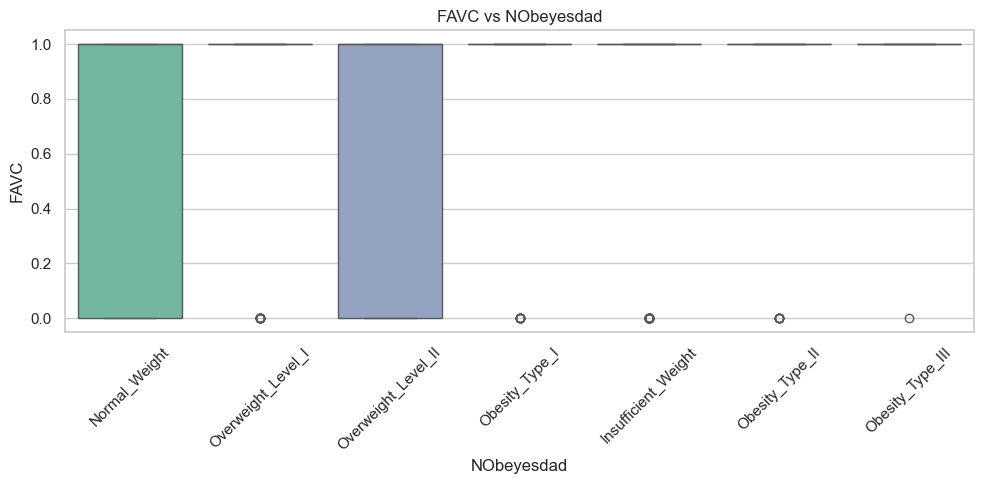

C:\Users\Super\AppData\Local\Temp\ipykernel_13440\2862060392.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.target, y=col, data=self.data, palette="Set2")


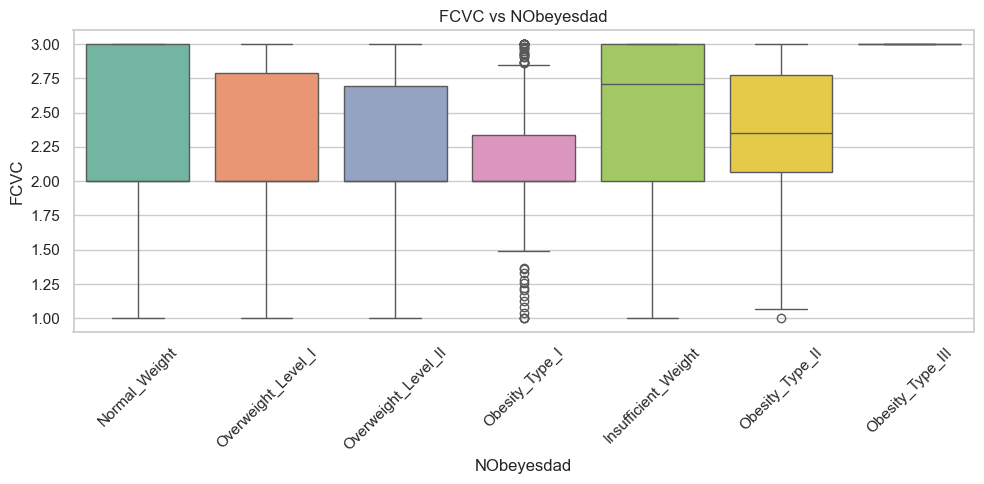

C:\Users\Super\AppData\Local\Temp\ipykernel_13440\2862060392.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.target, y=col, data=self.data, palette="Set2")


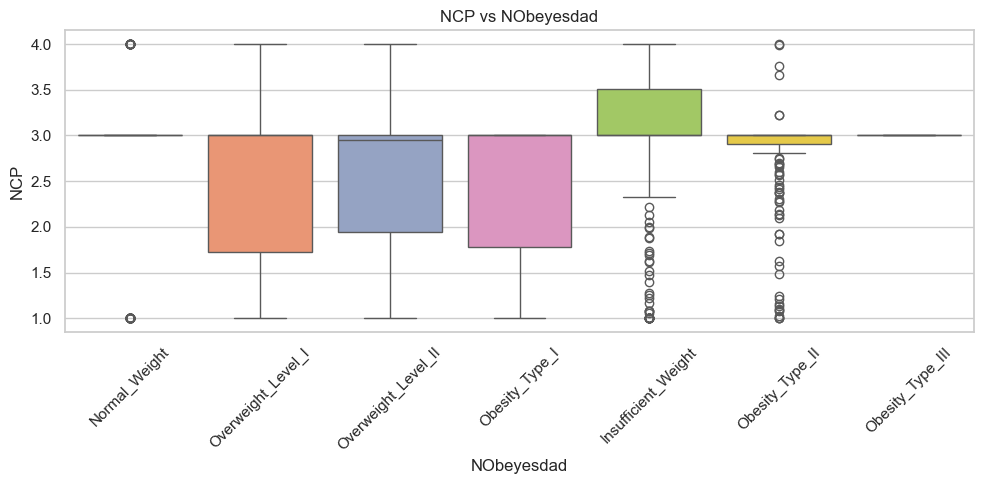

C:\Users\Super\AppData\Local\Temp\ipykernel_13440\2862060392.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.target, y=col, data=self.data, palette="Set2")


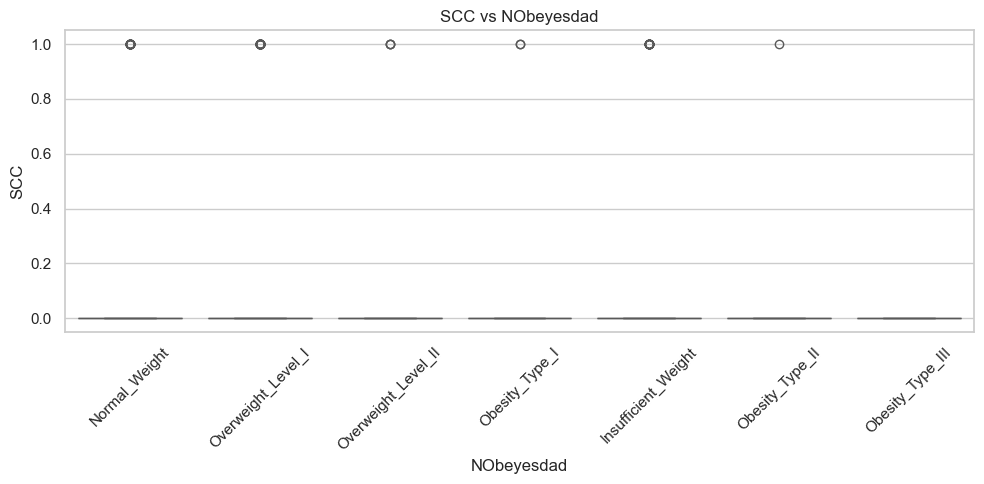

C:\Users\Super\AppData\Local\Temp\ipykernel_13440\2862060392.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.target, y=col, data=self.data, palette="Set2")


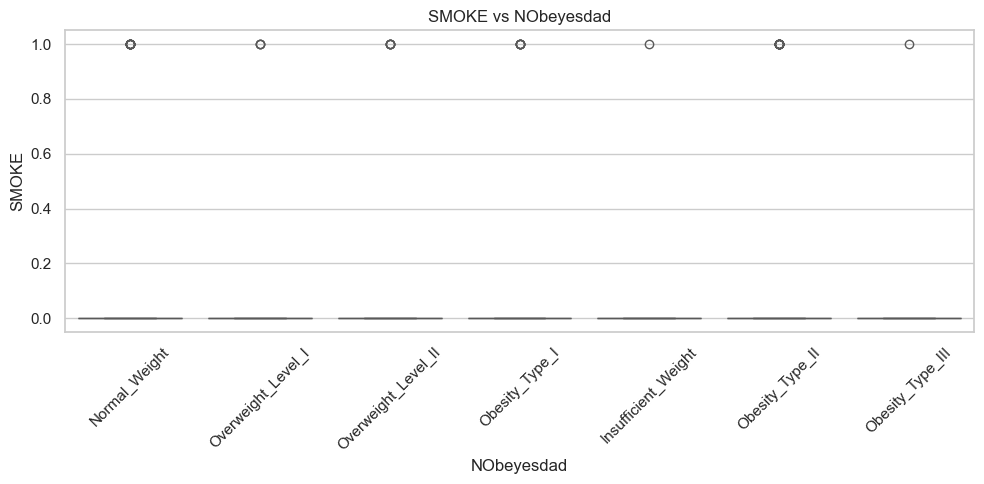

C:\Users\Super\AppData\Local\Temp\ipykernel_13440\2862060392.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.target, y=col, data=self.data, palette="Set2")


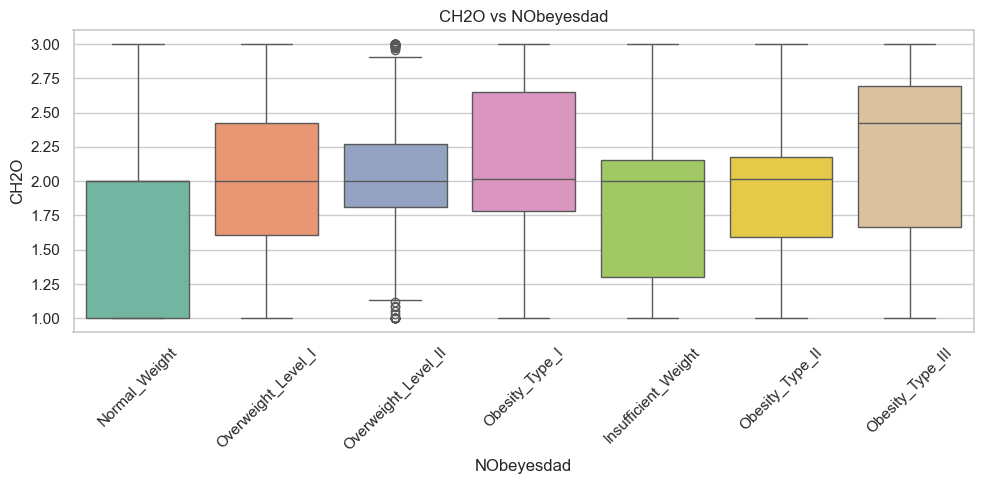

C:\Users\Super\AppData\Local\Temp\ipykernel_13440\2862060392.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.target, y=col, data=self.data, palette="Set2")


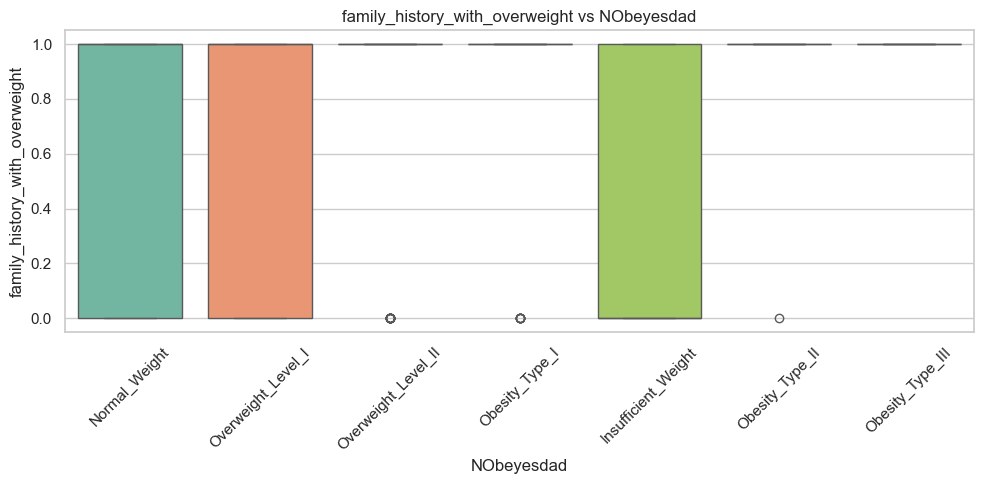

C:\Users\Super\AppData\Local\Temp\ipykernel_13440\2862060392.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.target, y=col, data=self.data, palette="Set2")


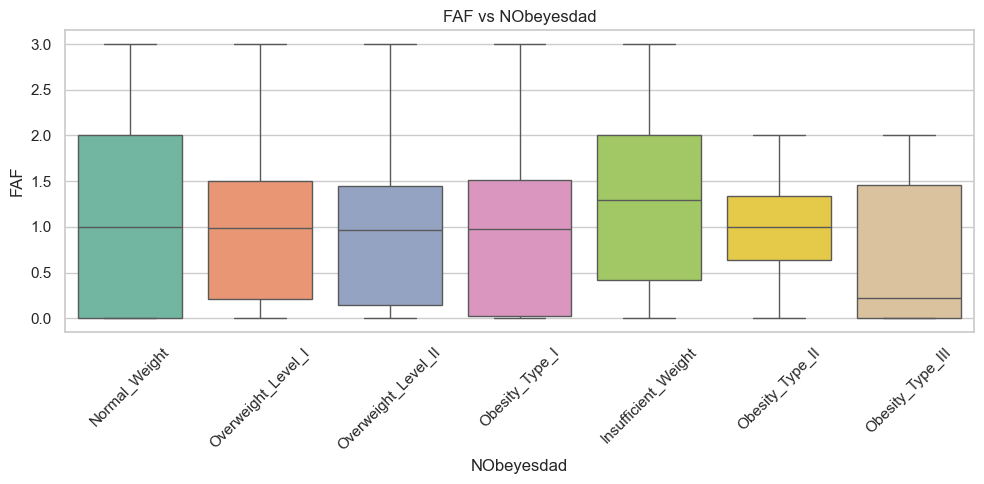

C:\Users\Super\AppData\Local\Temp\ipykernel_13440\2862060392.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=self.target, y=col, data=self.data, palette="Set2")


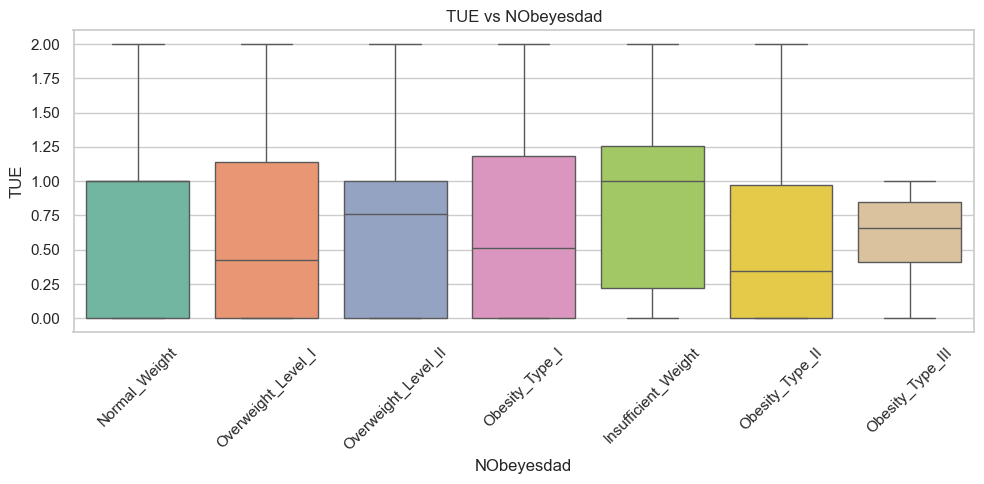


📈 Crosstab Heatmaps:


In [76]:
class BivariateAnalyzer:
    def __init__(self, data, target_column):
        self.data = data
        self.target = target_column
        sns.set(style="whitegrid")

    def correlation_heatmap(self):
        numerical_cols = self.data.select_dtypes(include='number').columns
        plt.figure(figsize=(10, 8))
        corr = self.data[numerical_cols].corr()
        sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Heatmap (Numerical Features)")
        plt.tight_layout()
        plt.show()

    def boxplots_against_target(self):
        numerical_cols = self.data.select_dtypes(include='number').columns
        if self.target in numerical_cols:
            numerical_cols = numerical_cols.drop(self.target)
        for col in numerical_cols:
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=self.target, y=col, data=self.data, palette="Set2")
            plt.title(f'{col} vs {self.target}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    def crosstab_heatmaps(self):
        categorical_cols = self.data.select_dtypes(include='object').columns
        if self.target in categorical_cols:
            categorical_cols = categorical_cols.drop(self.target)
        for col in categorical_cols:
            ctab = pd.crosstab(self.data[col], self.data[self.target])
            plt.figure(figsize=(10, 6))
            sns.heatmap(ctab, annot=True, fmt='d', cmap='YlGnBu')
            plt.title(f'{col} vs {self.target} - Crosstab Heatmap')
            plt.xlabel(self.target)
            plt.ylabel(col)
            plt.xticks(rotation=45)
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()

# Calling the BivariateAnalyzer
if __name__ == "__main__":
    target_column = "NObeyesdad"
    bivariate_analyzer = BivariateAnalyzer(data_encoded, target_column)

    print("\n📊 Correlation Heatmap:")
    bivariate_analyzer.correlation_heatmap()

    print("\n📦 Boxplots Against Target:")
    bivariate_analyzer.boxplots_against_target()

    print("\n📈 Crosstab Heatmaps:")
    bivariate_analyzer.crosstab_heatmaps()


### ✂️ **Data Splitting**

- 🔹 **Definition** – Dividing the dataset into separate parts for **training** and **testing** (and sometimes **validation**).  
- 🔹 **Purpose** – Ensures that the model is evaluated on **unseen data**, reducing **overfitting** and giving a realistic **performance estimate**.  
- 🔹 **Common Split Ratios** – Typically **70:30**, **80:20**, or **60:20:20** for **train:test** or **train:validation:test** splits.  
- 🔹 **Training Set** – Used to **train the machine learning model**.  
- 🔹 **Testing Set** – Used to **evaluate model performance** on **unseen data**.  
- 🔹 **Stratified Splitting** – Maintains **class distribution**, especially important in **classification problems**.  
- 🔹 **Tool Used** – Most commonly done using `train_test_split()` from **Scikit-learn**.


In [77]:
class DataSplitter:
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def split(self, test_size=0.2, random_state=42):
        return train_test_split(self.X, self.y, test_size=test_size, random_state=random_state)

# Calling the DataSplitter
if __name__ == "__main__":
    splitter = DataSplitter(X_scaled, y)
    X_train, X_test, y_train, y_test = splitter.split()

    print("\n📊 Train/Test Split:")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


📊 Train/Test Split:
X_train shape: (1444, 14), y_train shape: (1444,)
X_test shape: (362, 14), y_test shape: (362,)


### 🤖 **Model Training**

- 🔹 **Definition** – The process of feeding the training data to a **machine learning algorithm** so it can learn **patterns** and make **predictions**.  
- 🔹 **Goal** – To **minimize error** or **maximize accuracy** by adjusting internal **parameters** using the training data.  
- 🔹 **Model Choice** – Depends on the **problem type** (e.g., **classification**, **regression**) and the nature of the **data**.  
- 🔹 **Common Algorithms** – Include **Support Vector Machine (SVM)**, **Decision Trees**, **Logistic Regression**, **K-Nearest Neighbors (KNN)**, and more.  
- 🔹 **Fitting** – The `.fit()` method is used to **train the model** on the training set.  
- 🔹 **Hyperparameters** – Settings that can be **tuned** to improve performance, like **kernel type** in SVM or **tree depth** in Decision Trees.  
- 🔹 **Evaluation** – After training, the model is tested on the **test set** to evaluate how well it **generalizes**.


In [78]:
class ModelTrainer:
    def __init__(self):
        self.model = SVC(kernel='linear')

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        return self.model

# Calling the ModelTrainer
if __name__ == "__main__":
    trainer = ModelTrainer()
    model = trainer.train(X_train, y_train)

    print("\n🤖 Model Training Complete!")
    print(f"Model: {model}")


🤖 Model Training Complete!
Model: SVC(kernel='linear')


### 💾 **Model Storage**

- 🔹 **Definition** – Saving a trained machine learning model to disk so it can be reused later without retraining.  
- 🔹 **Purpose** – Helps avoid the time-consuming training process when deploying or sharing models.  
- 🔹 **Common Tools** – Libraries like **`pickle`**, **`joblib`**, or **`joblib.dump()`** are commonly used in Python.  
- 🔹 **Format** – Models are typically saved in a **binary file format** such as `.pkl` or `.sav`.  
- 🔹 **Loading Models** – Use `pickle.load()` or `joblib.load()` to reload the model for prediction.  
- 🔹 **Use Case** – Essential for **deployment**, **reusability**, and **model versioning** in real-world applications.


In [79]:
class ModelStorage:
    @staticmethod
    def save_model(model, filename='svm_obesity_model.pkl'):
        with open(filename, 'wb') as file:
            pickle.dump(model, file)

    @staticmethod
    def load_model(filename='svm_obesity_model.pkl'):
        with open(filename, 'rb') as file:
            return pickle.load(file)

# Calling the ModelStorage
if __name__ == "__main__":
    ModelStorage.save_model(model)
    print("\n💾 Model saved successfully!")
    
    # Load the model to verify
    loaded_model = ModelStorage.load_model()
    print("🔄 Loaded Model:", loaded_model)


💾 Model saved successfully!
🔄 Loaded Model: SVC(kernel='linear')
